 ***Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.
**predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.***

# Problem Statement:
****We are concentrating on voluntry churn because because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.****

***Voluntry churn:Voluntary churn occurs due to a decision by the customer to switch to another company or service provider.
Ivoluntary churn : It occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location***

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt 
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import cohen_kappa_score, make_scorer
from xgboost import XGBClassifier

C:\Users\sumit\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# dataset overview

In [2]:
telecom = pd.read_csv('ProductsCSV.csv')

In [3]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom.shape

(7043, 21)

In [5]:
pd.set_option('display.max_columns' ,30)

Here in telecom dataset containing 21 columns ,my target column is churn.

After performing exploratory data analysis  I will set churn as my target column and accordig to that I will split the dataset into training and testing by (70% training and 30% test) according to that we will apply a machine learning algorithm to predict the train and test dataset.

important features to predict churn is 

In [6]:
telecom["SeniorCitizen"].count()

7043

In [7]:
telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
telecom.isnull().sum()*100/telecom.isnull().count()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [9]:
#Replacing spaces with null values in total charges column
telecom['TotalCharges'] = telecom["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
telecom = telecom[telecom["TotalCharges"].notnull()]
telecom = telecom.reset_index()[telecom.columns]

#convert to float type
telecom["TotalCharges"] = telecom["TotalCharges"].astype(float)

In [10]:
telecom.isnull().sum()*100/telecom.isnull().count()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [11]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [12]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
telecom["tenure"] #monthly

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

In [14]:
telecom["tenure"].max()


72

according to given  data tenure is monthly

In [15]:
telecom.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

note:

1,Total number of unique customers are 7043

2,multiple lines 3 unique values

3,tech support

4,payment methods are of 4 types
 


Deleting unnecessary column

In [16]:
telecom.drop("customerID",axis=1,inplace=True)

In [17]:
telecom.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [18]:
telecom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


applying encoding for more than two variable

In [19]:
telecom.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

 no missing values found 

analysing independent features with Churn values

Percentage of Churn in Dataset

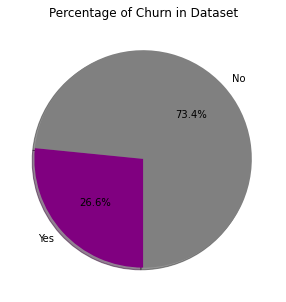

In [20]:
# Data to plot
sizes = telecom['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes,   colors=colors,
        autopct='%1.1f%%', labels= ['No','Yes'],shadow=True, startangle=270)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [21]:
Counter(telecom['gender'])#female :0 ,male:1

Counter({'Female': 3483, 'Male': 3549})

Categorical Independent Variable vs Target Variable

In [22]:
Gender=pd.crosstab(telecom['gender'],telecom['Churn']) 
Gender

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


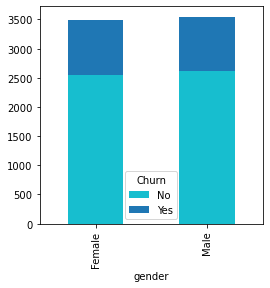

In [23]:
Gender.plot(kind="bar", stacked=True, figsize=(4,4) , colormap='tab10_r')

In [24]:
SeniorCitizen=pd.crosstab(telecom["SeniorCitizen"],telecom['Churn'])
SeniorCitizen

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


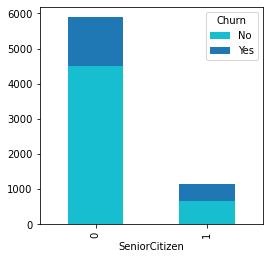

In [25]:
SeniorCitizen.plot(kind="bar", stacked=True, figsize=(4,4) , colormap='tab10_r')

In [26]:
telecom.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
Partner=pd.crosstab(telecom['Partner'],telecom['Churn']) 
Partner

Churn,No,Yes
Partner,,
No,2439,1200
Yes,2724,669


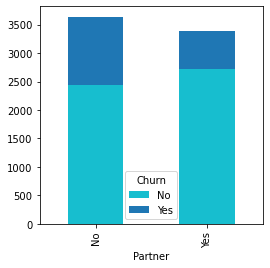

In [28]:
Partner.plot(kind="bar", stacked=True, figsize=(4,4) , colormap='tab10_r')

In [29]:
Dependent=pd.crosstab(telecom['Dependents'],telecom['Churn']) 
Dependent

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1773,326


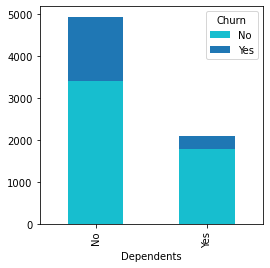

In [30]:
Dependent.plot(kind="bar",stacked=True, figsize=(4,4),colormap='tab10_r')

In [31]:
PaymentMethod=pd.crosstab(telecom['PaymentMethod'],telecom['Churn']) 
PaymentMethod

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


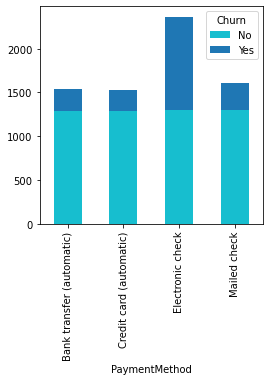

In [32]:
PaymentMethod.plot(kind="bar",stacked=True, figsize=(4,4),colormap='tab10_r')

In [33]:
telecom.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [34]:
OnlineSecurity=pd.crosstab(telecom['OnlineSecurity'],telecom['Churn']) 
OnlineSecurity 

Churn,No,Yes
OnlineSecurity,,
No,2036,1461
No internet service,1407,113
Yes,1720,295


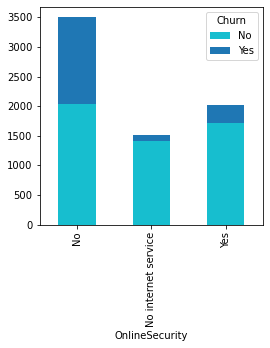

In [35]:
OnlineSecurity.plot(kind="bar",stacked=True, figsize=(4,4),colormap='tab10_r')

In [36]:
TechSupport=pd.crosstab(telecom['TechSupport'],telecom['Churn']) 
TechSupport

Churn,No,Yes
TechSupport,,
No,2026,1446
No internet service,1407,113
Yes,1730,310


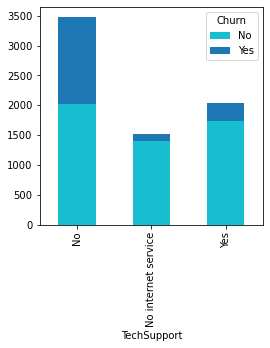

In [37]:
TechSupport.plot(kind="bar",stacked=True, figsize=(4,4),colormap='tab10_r')

In [38]:
Contract=pd.crosstab(telecom['Contract'],telecom['Churn']) 
Contract

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


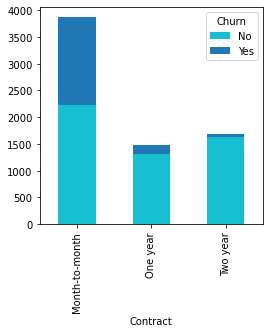

In [39]:
Contract.plot(kind="bar",stacked=True, figsize=(4,4),colormap='tab10_r')

In [40]:
PaymentMethod=pd.crosstab(telecom['PaymentMethod'],telecom['Churn']) 
PaymentMethod

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


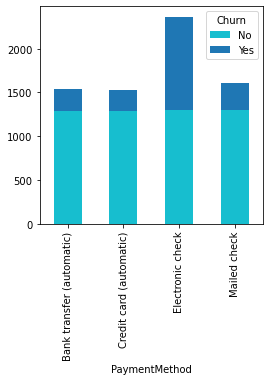

In [41]:
PaymentMethod.plot(kind="bar",stacked=True, figsize=(4,4),colormap='tab10_r')

In [42]:
telecom["tenure"].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [43]:
bins=[0,15,30,45,60,75] 
group=['0-15','16-30','31-45','46-60','60-75'] 
Tenure=pd.crosstab(pd.cut(telecom['tenure'],bins,labels=group),telecom['Churn']) 
Tenure

Churn,No,Yes
tenure,,
0-15,1323,1136
16-30,882,289
31-45,761,196
46-60,883,155
60-75,1314,93


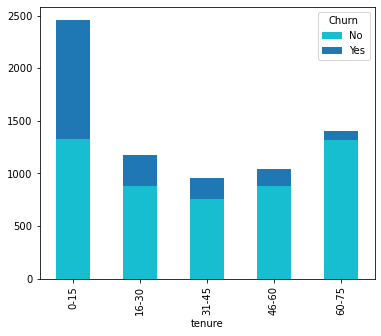

In [44]:
Tenure.plot(kind="bar",stacked=True, figsize=(6,5),colormap='tab10_r')

In [45]:
telecom["MonthlyCharges"].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [46]:
bins=[0,30,60,90,120] 
group=['0-30','30-60','60-90','90-120'] 
MonthlyCharges=pd.crosstab(pd.cut(telecom['tenure'],bins,labels=group),telecom['Churn']) 
MonthlyCharges

Churn,No,Yes
tenure,,
0-30,2205,1425
30-60,1644,351
60-90,1314,93


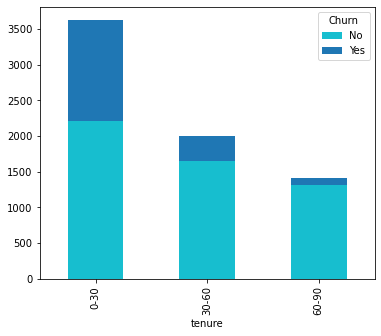

In [47]:
MonthlyCharges.plot(kind="bar",stacked=True, figsize=(6,5),colormap='tab10_r')

In [48]:
#convert to float type
telecom['TotalCharges'] = telecom['TotalCharges'].replace(r'\s+', np.nan, regex=True)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [49]:
telecom['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Text(0.5, 1.0, 'TotalCharges')

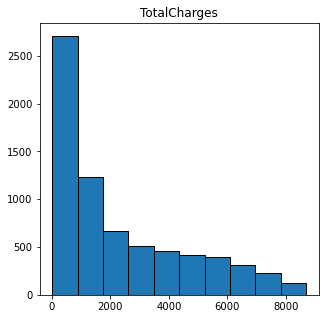

In [50]:
plt.hist(telecom["TotalCharges"],edgecolor="black")
plt.title("TotalCharges")

In [51]:
bins=[0,2000,4000,6000,8000,9000] 
group=['0-2000','2000-4000','4000-6000','6000-8000','8000-9000'] 

TotalCharges=pd.crosstab(pd.cut(telecom['TotalCharges'],bins,labels=group),telecom['Churn']) 
TotalCharges


Churn,No,Yes
TotalCharges,,
0-2000,2837,1339
2000-4000,921,287
4000-6000,801,155
6000-8000,529,85
8000-9000,75,3


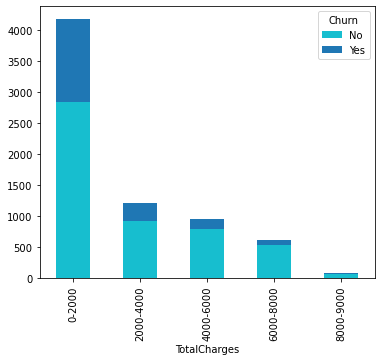

In [52]:
TotalCharges.plot(kind="bar",stacked=True, figsize=(6,5),colormap='tab10_r')

In [53]:
telecom_1=telecom.copy()
telecom_2=telecom.copy()

**Data Preprocessing**

applying binary encoding to features having 2 labels

In [54]:
telecom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
telecom["OnlineSecurity"].nunique()

3

now applying ordinal encoding to the features having more than 3 labels

In [56]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [57]:
telecom.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [58]:
telecom.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [59]:
no_encoding_col=["Churn","gender"]

In [60]:
cat_cols   = telecom.nunique()[telecom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in no_encoding_col]
cat_cols

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [61]:
#X=['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaymentMethod','MonthlyCharges','TotalCharges']

In [62]:

gender_map = {"Female" :1,"Male":0}
telecom_1["gender"]=telecom_1["gender"].map(gender_map)

In [63]:
telecom_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
bin_cols   = telecom_1.nunique()[telecom.nunique() == 2].keys().tolist()
del bin_cols[0:2]

In [65]:
yes_no_map = {"Yes" : 1, "No" : 0}
def binary_encode(features):
    for feature in features:
        telecom_1[feature] = telecom_1[feature].map(yes_no_map)
        
        
binary_encode(bin_cols)


In [66]:
telecom_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [67]:
telecom_1.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [68]:
multi_col=[i for i in cat_cols if i not in bin_cols]
multi_col.remove("SeniorCitizen")
multi_col

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [69]:
oe= OrdinalEncoder()
for i in multi_col :
    telecom_1[i] = oe.fit_transform(telecom_1[i].values.reshape(-1,1))

In [70]:
telecom_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,2.0,29.85,29.85,0
1,0,0,0,0,34,1,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0,3.0,56.95,1889.50,0
2,0,0,0,0,2,1,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1,3.0,53.85,108.15,1
3,0,0,0,0,45,0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0,0.0,42.30,1840.75,0
4,1,0,0,0,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,70.70,151.65,1


cheking for imbalance dataset

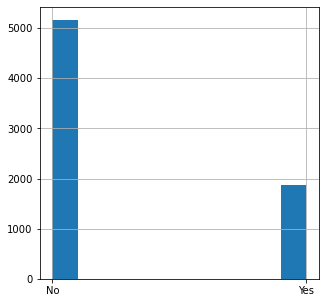

In [71]:
telecom['Churn'].hist()

In [72]:
telecom_1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

here we can do upscaling for churn class

In [73]:
churn= telecom_1[telecom_1['Churn']==1]

not_churn = telecom_1[telecom_1['Churn']==0]

In [74]:
print(churn.shape,not_churn.shape)

(1869, 20) (5163, 20)


In [75]:
#Create independent and Dependent Features for df1
columns = telecom_1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Churn"]]
# Store the variable we are predicting 
target = "Churn"
# Define a random state 
state = np.random.RandomState(42)
X = telecom_1[columns]
y= telecom_1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(7032, 19)
(7032,)


In [76]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

applying smotetomek resampling

In [77]:
smt = SMOTETomek(random_state=42)
X_res1,y_res1=smt.fit_resample(X, y)

In [78]:
X_res1.shape,y_res1.shape

((9566, 19), (9566,))

In [79]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res1)))

Original dataset shape Counter({0: 5163, 1: 1869})
Resampled dataset shape Counter({0: 4783, 1: 4783})


In [80]:
from sklearn.model_selection import train_test_split
X_trainS,X_testS,y_trainS,y_testS = train_test_split(X_res1,y_res1,test_size=0.30,random_state = 1)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainS = sc.fit_transform(X_trainS)
X_testS = sc.transform(X_testS)

In [81]:
print(X_trainS.shape)
print(X_testS.shape)
print(y_trainS.shape)
print(y_testS.shape)

(6696, 19)
(2870, 19)
(6696,)
(2870,)


applying randomoversampling

In [82]:
os =  RandomOverSampler()
X_res,y_res=os.fit_sample(X,y)

In [83]:
X_res.shape,y_res.shape

((10326, 19), (10326,))

In [84]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5163, 1: 1869})
Resampled dataset shape Counter({0: 5163, 1: 5163})


In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.30,random_state = 1)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7228, 19)
(3098, 19)
(7228,)
(3098,)


applying machine learning model

logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,accuracy_score
model1 = LogisticRegression() 
model2 = LogisticRegression() 

model1.fit(X_train, y_train)   #for ramdom over sampling technique 
model2.fit(X_trainS,y_trainS)  #for SMOTETomek over sampling tecqnique

LogisticRegression()

In [88]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_testS)


using random over sampling all outcomes for classification

In [89]:
confusion_matrix(y_test,pred1)

array([[1148,  426],
       [ 301, 1223]], dtype=int64)

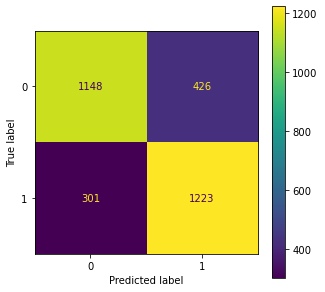

In [90]:
plot_confusion_matrix(model1, X_test, y_test)
plt.show()

In [91]:
accuracy_score(y_test,pred1)

0.7653324725629438

In [92]:
print("classification report using random over sampling")
print( classification_report(y_test,pred1))

classification report using random over sampling
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1574
           1       0.74      0.80      0.77      1524

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098



In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param = {'C':[1,3,5],'max_iter':[10,50,100]}

In [96]:
best_class = GridSearchCV(estimator=model1,param_grid=param, scoring='accuracy',cv=5, n_jobs=-1)

In [97]:
best_class.fit(X_train, y_train)

C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 3, 5], 'max_iter': [10, 50, 100]},
             scoring='accuracy')

In [98]:
best_class.best_params_

{'C': 5, 'max_iter': 10}

In [99]:
pred_cv = best_class.best_estimator_.predict(X_test)

In [100]:
pred_cv

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
accuracy_score(y_test,pred_cv)

0.7685603615235636

In [102]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1,2.0,29.85,29.85
1,0,0,0,0,34,1,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0,3.0,56.95,1889.50
2,0,0,0,0,2,1,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1,3.0,53.85,108.15
3,0,0,0,0,45,0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0,0.0,42.30,1840.75
4,1,0,0,0,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,70.70,151.65


using somtetomek balancing

In [103]:
confusion_matrix(y_testS,pred2)

array([[1093,  351],
       [ 211, 1215]], dtype=int64)

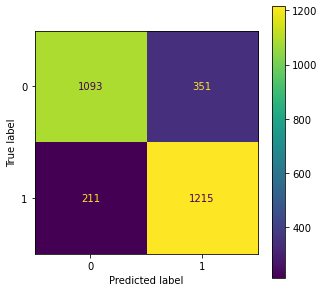

In [108]:
plot_confusion_matrix(model2, X_testS, y_testS)
plt.show()

In [109]:
print("classification report using smotetoek")
print( classification_report(y_testS,pred2))

classification report using smotetoek
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1444
           1       0.78      0.85      0.81      1426

    accuracy                           0.80      2870
   macro avg       0.81      0.80      0.80      2870
weighted avg       0.81      0.80      0.80      2870



In [110]:
accuracy_score(y_testS,pred2)

0.8041811846689896

In [112]:

best_class2 = GridSearchCV(estimator=model2,param_grid=param, scoring='accuracy',cv=5, n_jobs=-1)
best_class2.fit(X_trainS, y_trainS)


best_class2.best_params_



C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'C': 3, 'max_iter': 10}

In [113]:
pred_cv_2 = best_class2.best_estimator_.predict(X_testS)
pred_cv_2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [114]:

accuracy_score(y_testS,pred_cv_2)

0.802787456445993

JUST TRYING TO CHANGE ENCODING TECHNIQUE AND CHECKING THE classification I FOUND THAT CLASSIFICATION SCORE IS BETTER FOR SMOTETOMEK BALANCING  TECHNIQUE

RANDOM FOREST 

In [115]:
rfc1 = RandomForestClassifier(n_estimators = 300, random_state=21, n_jobs=-1 )
rfc1.fit(X_train, y_train)
feature_imp = pd.Series(rfc1.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

TotalCharges        0.172581
MonthlyCharges      0.160673
tenure              0.152079
Contract            0.113853
TechSupport         0.056816
OnlineSecurity      0.051261
PaymentMethod       0.049771
InternetService     0.029304
OnlineBackup        0.026981
gender              0.025939
PaperlessBilling    0.023246
DeviceProtection    0.022451
Partner             0.020946
MultipleLines       0.020386
Dependents          0.018161
SeniorCitizen       0.017388
StreamingMovies     0.016770
StreamingTV         0.015717
PhoneService        0.005673
dtype: float64

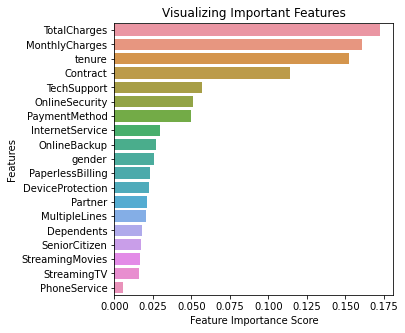

In [116]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [117]:
predictions1 = rfc1.predict(X_test)
predictions1

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [118]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.94      0.83      0.89      1574
           1       0.85      0.95      0.90      1524

    accuracy                           0.89      3098
   macro avg       0.90      0.89      0.89      3098
weighted avg       0.90      0.89      0.89      3098



In [119]:
accuracy_score(y_test,predictions1)

0.8908973531310523

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.965


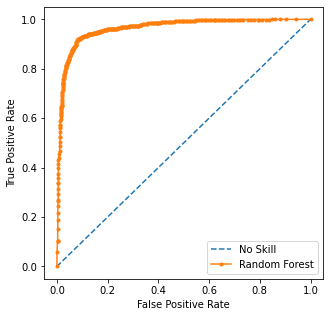

In [120]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = rfc1.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

using smotetomek class balancing 

In [121]:
rfc2 = RandomForestClassifier(n_estimators = 300, random_state=21, n_jobs=-1 )
rfc2.fit(X_trainS, y_trainS)
feature_imp_2 = pd.Series(rfc2.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp_2

Contract            0.155802
tenure              0.119594
TotalCharges        0.118599
MonthlyCharges      0.112304
TechSupport         0.090489
OnlineSecurity      0.087169
PaymentMethod       0.057373
OnlineBackup        0.041068
InternetService     0.035303
DeviceProtection    0.028520
MultipleLines       0.026069
Dependents          0.024328
Partner             0.020587
StreamingMovies     0.017619
StreamingTV         0.017198
gender              0.017075
PaperlessBilling    0.014921
SeniorCitizen       0.011776
PhoneService        0.004206
dtype: float64

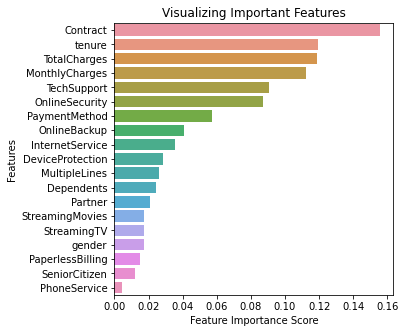

In [122]:
sns.barplot(x=feature_imp_2, y=feature_imp_2.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [123]:
predictions2 = rfc2.predict(X_testS)

In [124]:
predictions2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [125]:
from sklearn.metrics import classification_report,accuracy_score

In [126]:
print(classification_report(y_testS,predictions2))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1444
           1       0.86      0.87      0.86      1426

    accuracy                           0.86      2870
   macro avg       0.86      0.86      0.86      2870
weighted avg       0.86      0.86      0.86      2870



In [127]:
accuracy_score(y_testS,predictions2)

0.8630662020905924

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.970


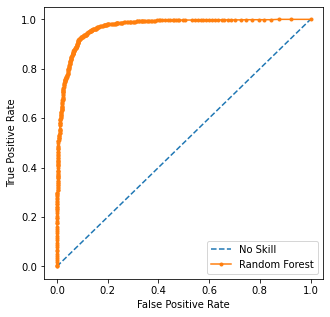

In [128]:
ns_probs = [0 for _ in range(len(y_testS))]
lr_probs = rfc1.predict_proba(X_testS)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_testS, ns_probs)
lr_auc = roc_auc_score(y_testS, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_testS, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_testS, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

AFTER  CLASSIFICATION REPORT USING SMOTEK AND RANDOM OVER SAMPLING BALANCING TECHNIQUE RANDOM FOREST IS GIVING BETTER CLASSIFICATION REPORT

GBM Classifier

In [129]:
gbm = GradientBoostingClassifier(learning_rate=0.01, max_depth=8, n_estimators=500)

In [130]:
gbm.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, n_estimators=500)

In [131]:
y_2_pred = gbm.predict(X_test)

In [132]:
conf_mat = confusion_matrix(y_2_pred, y_test)
print(conf_mat)

[[1254   88]
 [ 320 1436]]


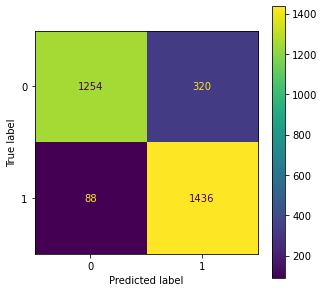

In [133]:
plot_confusion_matrix(gbm, X_test, y_test)
plt.show()

In [134]:
print(precision_score(y_test,y_2_pred))
print(recall_score(y_test, y_2_pred))
print(f1_score(y_test, y_2_pred))

0.8177676537585421
0.9422572178477691
0.875609756097561


In [149]:
predictions = gbm.predict(X_test)

In [150]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1574
           1       0.82      0.94      0.88      1524

    accuracy                           0.87      3098
   macro avg       0.88      0.87      0.87      3098
weighted avg       0.88      0.87      0.87      3098



In [135]:
accuracy = accuracy_score(y_test, y_2_pred)

In [136]:
accuracy

0.868302130406714

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = gbm.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Base Model')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Gradient Boosting')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

COMPAIRING WITH BOOSTING TECHNIQUE THAT IS GRADIENT BOOSTING  PREDICTION IS BETTER IN THE CASE OF BEGGING TECHNIQUE THAT IS RANDOM FOREST

f1 SCORE IS BETTER IN THE CASE OF RANDOM FOREST